In [1]:
! pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import calinski_harabasz_score

# NN5

In [3]:
nn5_features_lstm_8 = pd.read_csv('/kaggle/input/ae-nn5-unsupervised-attenlstm-new/Features_nn5_LSTM_8.csv',sep=',', header=None)
nn5_features_lstm_8 = nn5_features_lstm_8.to_numpy().astype('float64')

nn5_features_lstm_16 = pd.read_csv('/kaggle/input/ae-nn5-unsupervised-attenlstm-new/Features_nn5_LSTM_16.csv',sep=',', header=None)
nn5_features_lstm_16 = nn5_features_lstm_16.to_numpy().astype('float64')

nn5_features_lstm_32 = pd.read_csv('/kaggle/input/ae-nn5-unsupervised-attenlstm-new/Features_nn5_LSTM_32.csv',sep=',', header=None)
nn5_features_lstm_32 = nn5_features_lstm_32.to_numpy().astype('float64')

nn5_features_cnn_8 = pd.read_csv('/kaggle/input/ae-nn5-unsupervised-attencnn-new/Features_nn5_atten_CNN_8.csv',sep=',', header=None)
nn5_features_cnn_8 = nn5_features_cnn_8.to_numpy().astype('float64')

nn5_features_cnn_16 = pd.read_csv('/kaggle/input/ae-nn5-unsupervised-attencnn-new/Features_nn5_atten_CNN_16.csv',sep=',', header=None)
nn5_features_cnn_16 = nn5_features_cnn_16.to_numpy().astype('float64')

nn5_features_cnn_32 = pd.read_csv('/kaggle/input/ae-nn5-unsupervised-attencnn-new/Features_nn5_atten_CNN_32.csv',sep=',', header=None)
nn5_features_cnn_32 = nn5_features_cnn_32.to_numpy().astype('float64')

nn5_features_hyndman = pd.read_csv('/kaggle/input/hyndmankhsnn5features/fs_hyndman_Fixed_nn5 (1).csv',sep=',', header=0)
nn5_features_hyndman = nn5_features_hyndman.to_numpy().astype('float64')

nn5_features_khs = pd.read_csv('/kaggle/input/hyndmankhsnn5features/fs_KHS_NN5.csv',sep=',', header=0)
nn5_features_khs = nn5_features_khs.to_numpy().astype('float64')

In [4]:
def normalize_feature_vectors(features):
    minimum = features.min(0)
    maximum = features.max(0)

    for i in range(len(features)):
        features[i] = (features[i] - minimum) / (maximum - minimum)


    return features

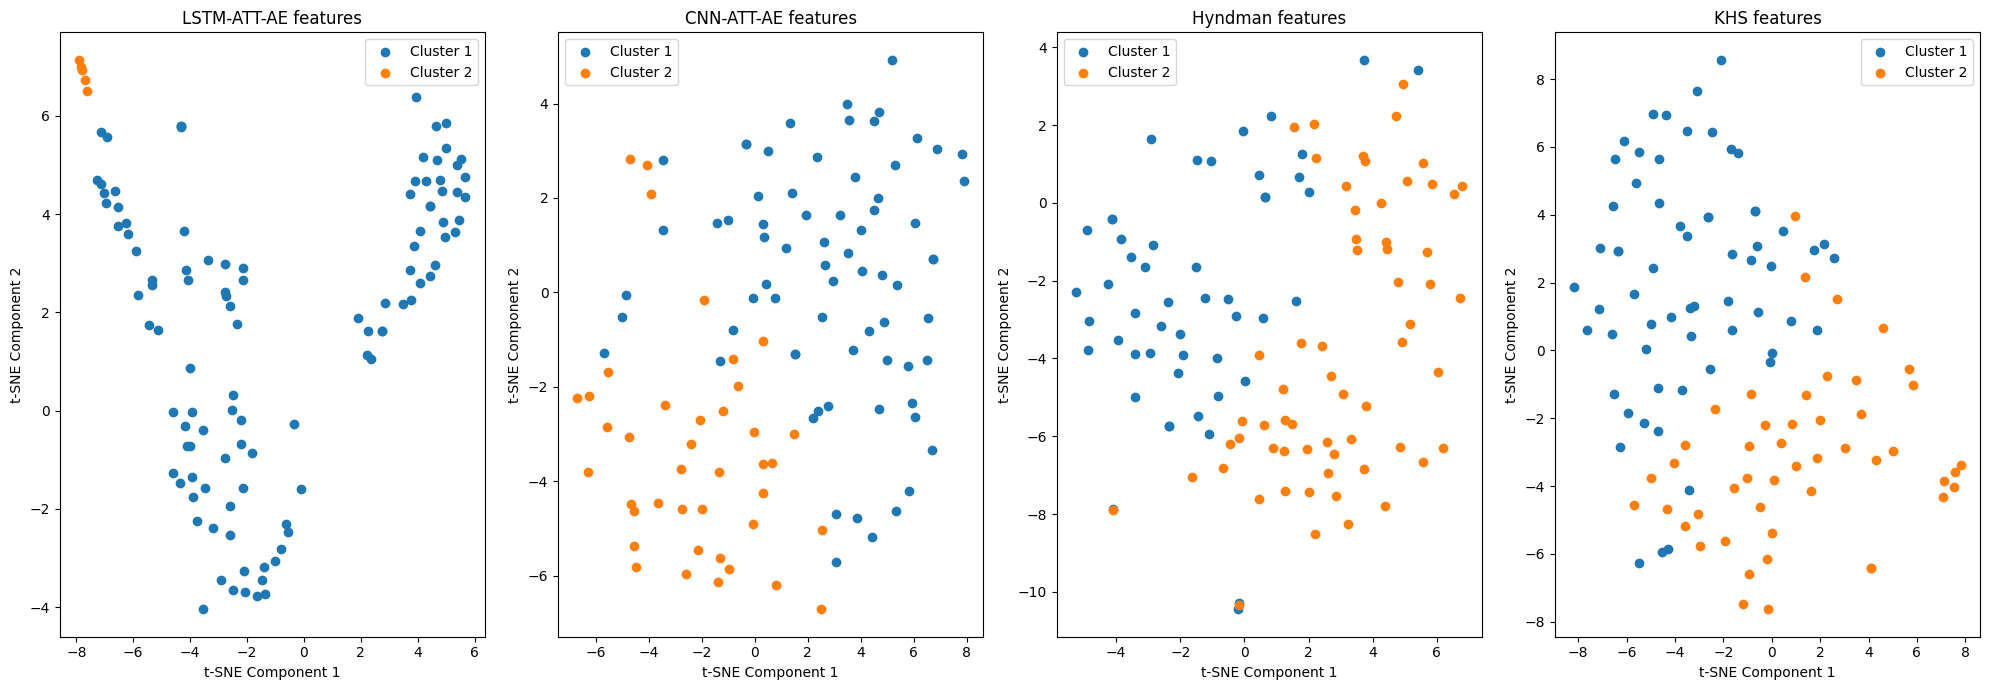

In [5]:
# Step 1: Standardize the features
scaled_features_lstm_8 = normalize_feature_vectors(nn5_features_lstm_8)
scaled_features_lstm_16 = normalize_feature_vectors(nn5_features_lstm_16)
scaled_features_lstm_32 = normalize_feature_vectors(nn5_features_lstm_32)

scaled_features_cnn_8 = normalize_feature_vectors(nn5_features_cnn_8)
scaled_features_cnn_16 = normalize_feature_vectors(nn5_features_cnn_16)
scaled_features_cnn_32 = normalize_feature_vectors(nn5_features_cnn_32)

scaled_features_hyndman = normalize_feature_vectors(nn5_features_hyndman)
scaled_features_khs = normalize_feature_vectors(nn5_features_khs)

# Step 2: Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features_lstm_8 = tsne.fit_transform(scaled_features_lstm_8)
embedded_features_lstm_16 = tsne.fit_transform(scaled_features_lstm_16)
embedded_features_lstm_32 = tsne.fit_transform(scaled_features_lstm_32)

embedded_features_cnn_8 = tsne.fit_transform(scaled_features_cnn_8)
embedded_features_cnn_16 = tsne.fit_transform(scaled_features_cnn_16)
embedded_features_cnn_32 = tsne.fit_transform(scaled_features_cnn_32)

embedded_features_hyndman = tsne.fit_transform(scaled_features_hyndman)
embedded_features_khs = tsne.fit_transform(scaled_features_khs)

# Step 4: Perform clustering using SpectralClustering
number_of_clusters = 2  # Set the number of clusters

spectral_clustering = SpectralClustering(n_clusters=number_of_clusters, assign_labels='discretize', random_state=0)
spectral_labels_lstm_8 = spectral_clustering.fit_predict(scaled_features_lstm_8)
spectral_labels_lstm_16 = spectral_clustering.fit_predict(scaled_features_lstm_16)
spectral_labels_lstm_32 = spectral_clustering.fit_predict(scaled_features_lstm_32)
spectral_labels_cnn_8 = spectral_clustering.fit_predict(scaled_features_cnn_8)
spectral_labels_cnn_16 = spectral_clustering.fit_predict(scaled_features_cnn_16)
spectral_labels_cnn_32 = spectral_clustering.fit_predict(scaled_features_cnn_32)
spectral_labels_hyndman = spectral_clustering.fit_predict(scaled_features_hyndman)
spectral_labels_khs = spectral_clustering.fit_predict(scaled_features_khs)


# Step 5: Visualize the clusters
plt.figure(figsize=(20, 7))

plt.subplot(1, 4, 1)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_lstm_32[spectral_labels_lstm_32 == i, 0], embedded_features_lstm_32[spectral_labels_lstm_32 == i, 1],
                label=f'Cluster {i+1}')
plt.title('LSTM-ATT-AE features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()


plt.subplot(1, 4, 2)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_cnn_8[spectral_labels_cnn_8 == i, 0], embedded_features_cnn_8[spectral_labels_cnn_8 == i, 1],
                label=f'Cluster {i+1}')
plt.title('CNN-ATT-AE features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 4, 3)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_hyndman[spectral_labels_hyndman == i, 0], embedded_features_hyndman[spectral_labels_hyndman == i, 1],
                label=f'Cluster {i+1}')
plt.title('Hyndman features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()  

plt.subplot(1, 4, 4)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_khs[spectral_labels_khs == i, 0], embedded_features_khs[spectral_labels_khs == i, 1],
                label=f'Cluster {i+1}')
plt.title('KHS features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.savefig('NN5.png')
plt.show()

# Hospital

In [6]:
hospital_features_lstm_8 = pd.read_csv('/kaggle/input/ae-hospital-unsupervised-attenlstm-new/Features_hospital_attenLSTM_8.csv',sep=',', header=None)
hospital_features_lstm_8 = hospital_features_lstm_8.to_numpy().astype('float64')

hospital_features_lstm_16 = pd.read_csv('/kaggle/input/ae-hospital-unsupervised-attenlstm-new/Features_hospital_attenLSTM_16.csv',sep=',', header=None)
hospital_features_lstm_16 = hospital_features_lstm_16.to_numpy().astype('float64')

hospital_features_lstm_32 = pd.read_csv('/kaggle/input/ae-hospital-unsupervised-attenlstm-new/Features_hospital_attenLSTM_32.csv',sep=',', header=None)
hospital_features_lstm_32 = hospital_features_lstm_32.to_numpy().astype('float64')

hospital_features_cnn_8 = pd.read_csv('/kaggle/input/ae-hospital-unsupervised-attencnn-new/Features_hospital_attenCNN_8.csv',sep=',', header=None)
hospital_features_cnn_8 = hospital_features_cnn_8.to_numpy().astype('float64')

hospital_features_cnn_16 = pd.read_csv('/kaggle/input/ae-hospital-unsupervised-attencnn-new/Features_hospital_attenCNN_16.csv',sep=',', header=None)
hospital_features_cnn_16 = hospital_features_cnn_16.to_numpy().astype('float64')

hospital_features_cnn_32 = pd.read_csv('/kaggle/input/ae-hospital-unsupervised-attencnn-new/Features_hospital_attenCNN_32.csv',sep=',', header=None)
hospital_features_cnn_32 = hospital_features_cnn_32.to_numpy().astype('float64')

hospital_features_hyndman = pd.read_csv('/kaggle/input/hyndmanhospital/hospital_dataset-hyndman-features.csv',sep=',', header=0)
hospital_features_hyndman = hospital_features_hyndman.to_numpy().astype('float64')
hospital_features_khs = pd.read_csv('/kaggle/input/khshospitaltourism/fs_khs_hopsiptal_findfreq.csv',sep=',', header=0)
hospital_features_khs = hospital_features_khs.to_numpy().astype('float64')

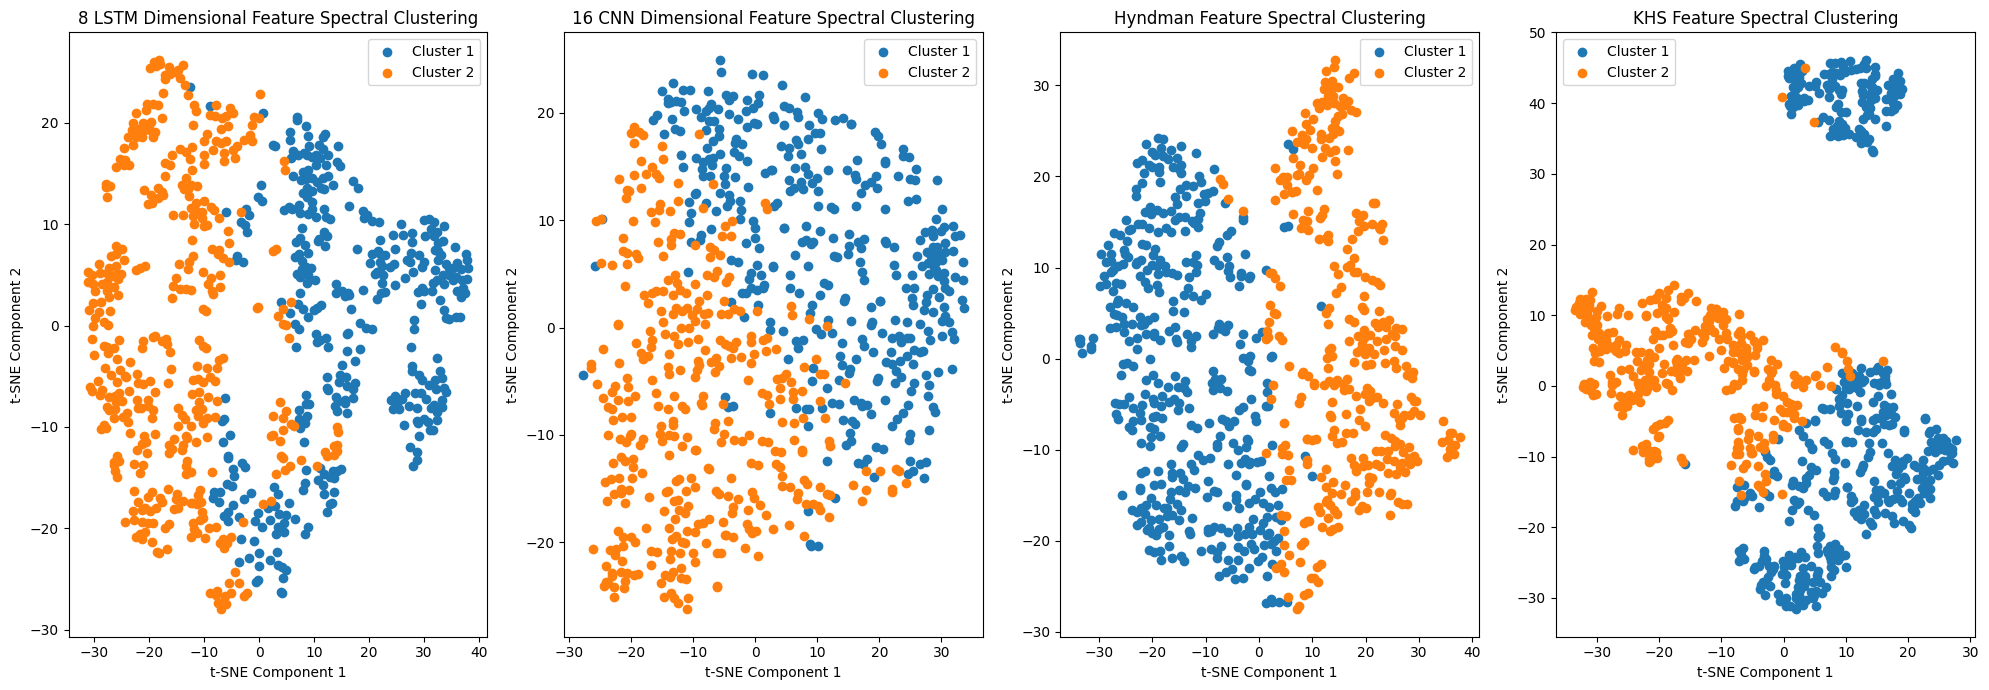

In [7]:
# Step 1: Standardize the features
scaled_features_lstm_8 = normalize_feature_vectors(hospital_features_lstm_8)
scaled_features_lstm_16 = normalize_feature_vectors(hospital_features_lstm_16)
scaled_features_lstm_32 = normalize_feature_vectors(hospital_features_lstm_32)

scaled_features_cnn_8 = normalize_feature_vectors(hospital_features_cnn_8)
scaled_features_cnn_16 = normalize_feature_vectors(hospital_features_cnn_16)
scaled_features_cnn_32 = normalize_feature_vectors(hospital_features_cnn_32)

scaled_features_hyndman = normalize_feature_vectors(hospital_features_hyndman)
scaled_features_khs = normalize_feature_vectors(hospital_features_khs)

# Step 2: Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features_lstm_8 = tsne.fit_transform(scaled_features_lstm_8)
embedded_features_lstm_16 = tsne.fit_transform(scaled_features_lstm_16)
embedded_features_lstm_32 = tsne.fit_transform(scaled_features_lstm_32)

embedded_features_cnn_8 = tsne.fit_transform(scaled_features_cnn_8)
embedded_features_cnn_16 = tsne.fit_transform(scaled_features_cnn_16)
embedded_features_cnn_32 = tsne.fit_transform(scaled_features_cnn_32)

embedded_features_hyndman = tsne.fit_transform(scaled_features_hyndman)
embedded_features_khs = tsne.fit_transform(scaled_features_khs)

# Step 4: Perform clustering using SpectralClustering
number_of_clusters = 2  # Set the number of clusters

spectral_clustering = SpectralClustering(n_clusters=number_of_clusters, assign_labels='discretize', random_state=0)
spectral_labels_lstm_8 = spectral_clustering.fit_predict(scaled_features_lstm_8)
spectral_labels_lstm_16 = spectral_clustering.fit_predict(scaled_features_lstm_16)
spectral_labels_lstm_32 = spectral_clustering.fit_predict(scaled_features_lstm_32)
spectral_labels_cnn_8 = spectral_clustering.fit_predict(scaled_features_cnn_8)
spectral_labels_cnn_16 = spectral_clustering.fit_predict(scaled_features_cnn_16)
spectral_labels_cnn_32 = spectral_clustering.fit_predict(scaled_features_cnn_32)
spectral_labels_hyndman = spectral_clustering.fit_predict(scaled_features_hyndman)
spectral_labels_khs = spectral_clustering.fit_predict(scaled_features_khs)


# Step 5: Visualize the clusters
plt.figure(figsize=(20, 7))

plt.subplot(1, 4, 1)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_lstm_8[spectral_labels_lstm_8 == i, 0], embedded_features_lstm_8[spectral_labels_lstm_8 == i, 1],
                label=f'Cluster {i+1}')
plt.title('8 LSTM Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()


plt.subplot(1, 4, 2)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_cnn_16[spectral_labels_cnn_16 == i, 0], embedded_features_cnn_16[spectral_labels_cnn_16 == i, 1],
                label=f'Cluster {i+1}')
plt.title('16 CNN Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 4, 3)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_hyndman[spectral_labels_hyndman == i, 0], embedded_features_hyndman[spectral_labels_hyndman == i, 1],
                label=f'Cluster {i+1}')
plt.title('Hyndman Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()  

plt.subplot(1, 4, 4)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_khs[spectral_labels_khs == i, 0], embedded_features_khs[spectral_labels_khs == i, 1],
                label=f'Cluster {i+1}')
plt.title('KHS Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.show()

# Tourism

In [8]:
tourism_features_lstm_8 = pd.read_csv('/kaggle/input/ae-tourism-unsupervised-attenlstm-new/Features_tourism_attenLSTM_8.csv',sep=',', header=None)
tourism_features_lstm_8 = tourism_features_lstm_8.to_numpy().astype('float64')

tourism_features_lstm_16 = pd.read_csv('/kaggle/input/ae-tourism-unsupervised-attenlstm-new/Features_tourism_attenLSTM_16.csv',sep=',', header=None)
tourism_features_lstm_16 = tourism_features_lstm_16.to_numpy().astype('float64')

tourism_features_lstm_32 = pd.read_csv('/kaggle/input/ae-tourism-unsupervised-attenlstm-new/Features_tourism_attenLSTM_32.csv',sep=',', header=None)
tourism_features_lstm_32 = tourism_features_lstm_32.to_numpy().astype('float64')

tourism_features_cnn_8 = pd.read_csv('/kaggle/input/ae-tourism-unsupervised-attencnn-new/Features_tourism_8.csv',sep=',', header=None)
tourism_features_cnn_8 = tourism_features_cnn_8.to_numpy().astype('float64')

tourism_features_cnn_16 = pd.read_csv('/kaggle/input/ae-tourism-unsupervised-attencnn-new/Features_tourism_16.csv',sep=',', header=None)
tourism_features_cnn_16 = tourism_features_cnn_16.to_numpy().astype('float64')

tourism_features_cnn_32 = pd.read_csv('/kaggle/input/ae-tourism-unsupervised-attencnn-new/Features_tourism_32.csv',sep=',', header=None)
tourism_features_cnn_32 = tourism_features_cnn_32.to_numpy().astype('float64')

tourism_features_hyndman = pd.read_csv('/kaggle/input/hyndman-tourism/fs_hyndman_f-4_tourism.csv',sep=',', header=0)
tourism_features_hyndman = tourism_features_hyndman.to_numpy().astype('float64')

tourism_features_khs = pd.read_csv('/kaggle/input/khshospitaltourism/fs_KHS_Tourism.csv',sep=',', header=0)
tourism_features_khs = tourism_features_khs.to_numpy().astype('float64')

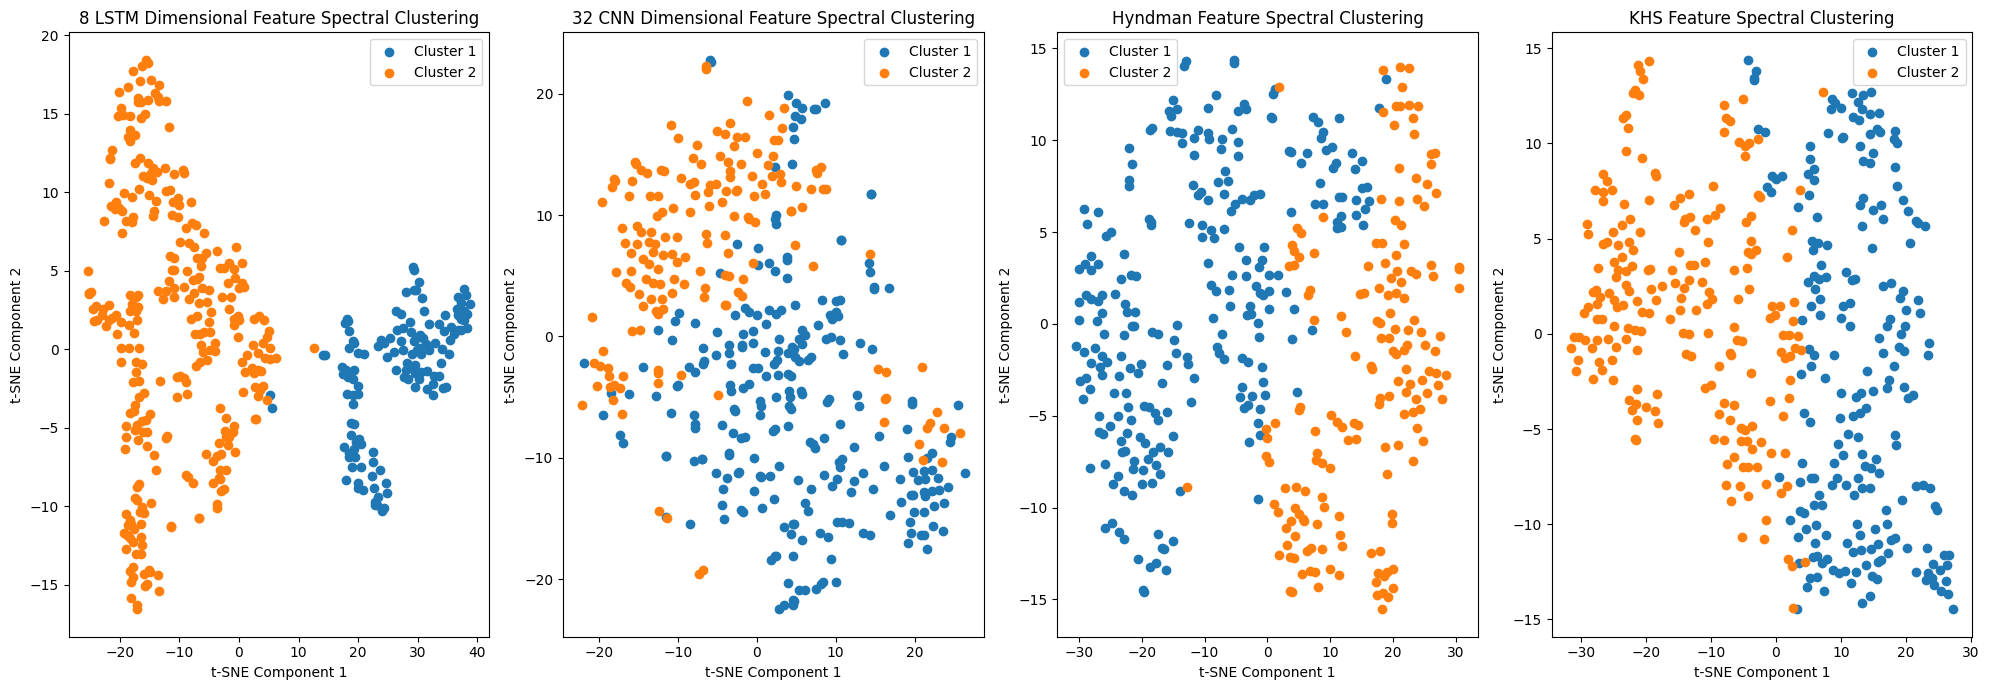

In [9]:
# Step 1: Standardize the features
scaled_features_lstm_8 = normalize_feature_vectors(tourism_features_lstm_8)
scaled_features_lstm_16 = normalize_feature_vectors(tourism_features_lstm_16)
scaled_features_lstm_32 = normalize_feature_vectors(tourism_features_lstm_32)

scaled_features_cnn_8 = normalize_feature_vectors(tourism_features_cnn_8)
scaled_features_cnn_16 = normalize_feature_vectors(tourism_features_cnn_16)
scaled_features_cnn_32 = normalize_feature_vectors(tourism_features_cnn_32)

scaled_features_hyndman = normalize_feature_vectors(tourism_features_hyndman)
scaled_features_khs = normalize_feature_vectors(tourism_features_khs)

# Step 2: Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features_lstm_8 = tsne.fit_transform(scaled_features_lstm_8)
embedded_features_lstm_16 = tsne.fit_transform(scaled_features_lstm_16)
embedded_features_lstm_32 = tsne.fit_transform(scaled_features_lstm_32)

embedded_features_cnn_8 = tsne.fit_transform(scaled_features_cnn_8)
embedded_features_cnn_16 = tsne.fit_transform(scaled_features_cnn_16)
embedded_features_cnn_32 = tsne.fit_transform(scaled_features_cnn_32)

embedded_features_hyndman = tsne.fit_transform(scaled_features_hyndman)
embedded_features_khs = tsne.fit_transform(scaled_features_khs)

# Step 4: Perform clustering using SpectralClustering
number_of_clusters = 2  # Set the number of clusters

spectral_clustering = SpectralClustering(n_clusters=number_of_clusters, assign_labels='discretize', random_state=0)
spectral_labels_lstm_8 = spectral_clustering.fit_predict(scaled_features_lstm_8)
spectral_labels_lstm_16 = spectral_clustering.fit_predict(scaled_features_lstm_16)
spectral_labels_lstm_32 = spectral_clustering.fit_predict(scaled_features_lstm_32)
spectral_labels_cnn_8 = spectral_clustering.fit_predict(scaled_features_cnn_8)
spectral_labels_cnn_16 = spectral_clustering.fit_predict(scaled_features_cnn_16)
spectral_labels_cnn_32 = spectral_clustering.fit_predict(scaled_features_cnn_32)
spectral_labels_hyndman = spectral_clustering.fit_predict(scaled_features_hyndman)
spectral_labels_khs = spectral_clustering.fit_predict(scaled_features_khs)


# Step 5: Visualize the clusters
plt.figure(figsize=(20, 7))

plt.subplot(1, 4, 1)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_lstm_8[spectral_labels_lstm_8 == i, 0], embedded_features_lstm_8[spectral_labels_lstm_8 == i, 1],
                label=f'Cluster {i+1}')
plt.title('8 LSTM Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()


plt.subplot(1, 4, 2)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_cnn_32[spectral_labels_cnn_32 == i, 0], embedded_features_cnn_32[spectral_labels_cnn_32 == i, 1],
                label=f'Cluster {i+1}')
plt.title('32 CNN Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 4, 3)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_hyndman[spectral_labels_hyndman == i, 0], embedded_features_hyndman[spectral_labels_hyndman == i, 1],
                label=f'Cluster {i+1}')
plt.title('Hyndman Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()  

plt.subplot(1, 4, 4)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_khs[spectral_labels_khs == i, 0], embedded_features_khs[spectral_labels_khs == i, 1],
                label=f'Cluster {i+1}')
plt.title('KHS Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.show()

# CIF2016

## CIF LSTM

In [10]:
cif_features_lstm_8 = pd.read_csv('/kaggle/input/ae-cif012-unsupervised-attenlstm-new/Features_LSTM_cif012_8.csv',sep=',', header=None)
cif_features_lstm_8 = cif_features_lstm_8.to_numpy().astype('float64')

cif_features_lstm_16 = pd.read_csv('/kaggle/input/ae-cif012-unsupervised-attenlstm-new/Features_LSTM_cif012_16.csv',sep=',', header=None)
cif_features_lstm_16 = cif_features_lstm_16.to_numpy().astype('float64')

cif_features_lstm_32 = pd.read_csv('/kaggle/input/ae-cif012-unsupervised-attenlstm-new/Features_LSTM_cif012_32.csv',sep=',', header=None)
cif_features_lstm_32 = cif_features_lstm_32.to_numpy().astype('float64')

cif_features_cnn_8 = pd.read_csv('/kaggle/input/ae-cif12-unsupervised-attencnn-new/Features_atten_CNN_cif012_8.csv',sep=',', header=None)
cif_features_cnn_8 = cif_features_cnn_8.to_numpy().astype('float64')

cif_features_cnn_16 = pd.read_csv('/kaggle/input/ae-cif12-unsupervised-attencnn-new/Features_atten_CNN_cif012_16.csv',sep=',', header=None)
cif_features_cnn_16 = cif_features_cnn_16.to_numpy().astype('float64')

cif_features_cnn_32 = pd.read_csv('/kaggle/input/ae-cif12-unsupervised-attencnn-new/Features_atten_CNN_cif012_32.csv',sep=',', header=None)
cif_features_cnn_32 = cif_features_cnn_32.to_numpy().astype('float64')

cif_features_hyndman = pd.read_csv('/kaggle/input/hospital-cif-hyndman/cif-dataset-o12-hyndman-features.csv',sep=',', header=0)
cif_features_hyndman = cif_features_hyndman.to_numpy().astype('float64')

cif_features_khs = pd.read_csv('/kaggle/input/ae-cif12-unsupervised-attencnn-new/Features_atten_CNN_cif012_32.csv',sep=',', header=0)
cif_features_khs = cif_features_khs.to_numpy().astype('float64')

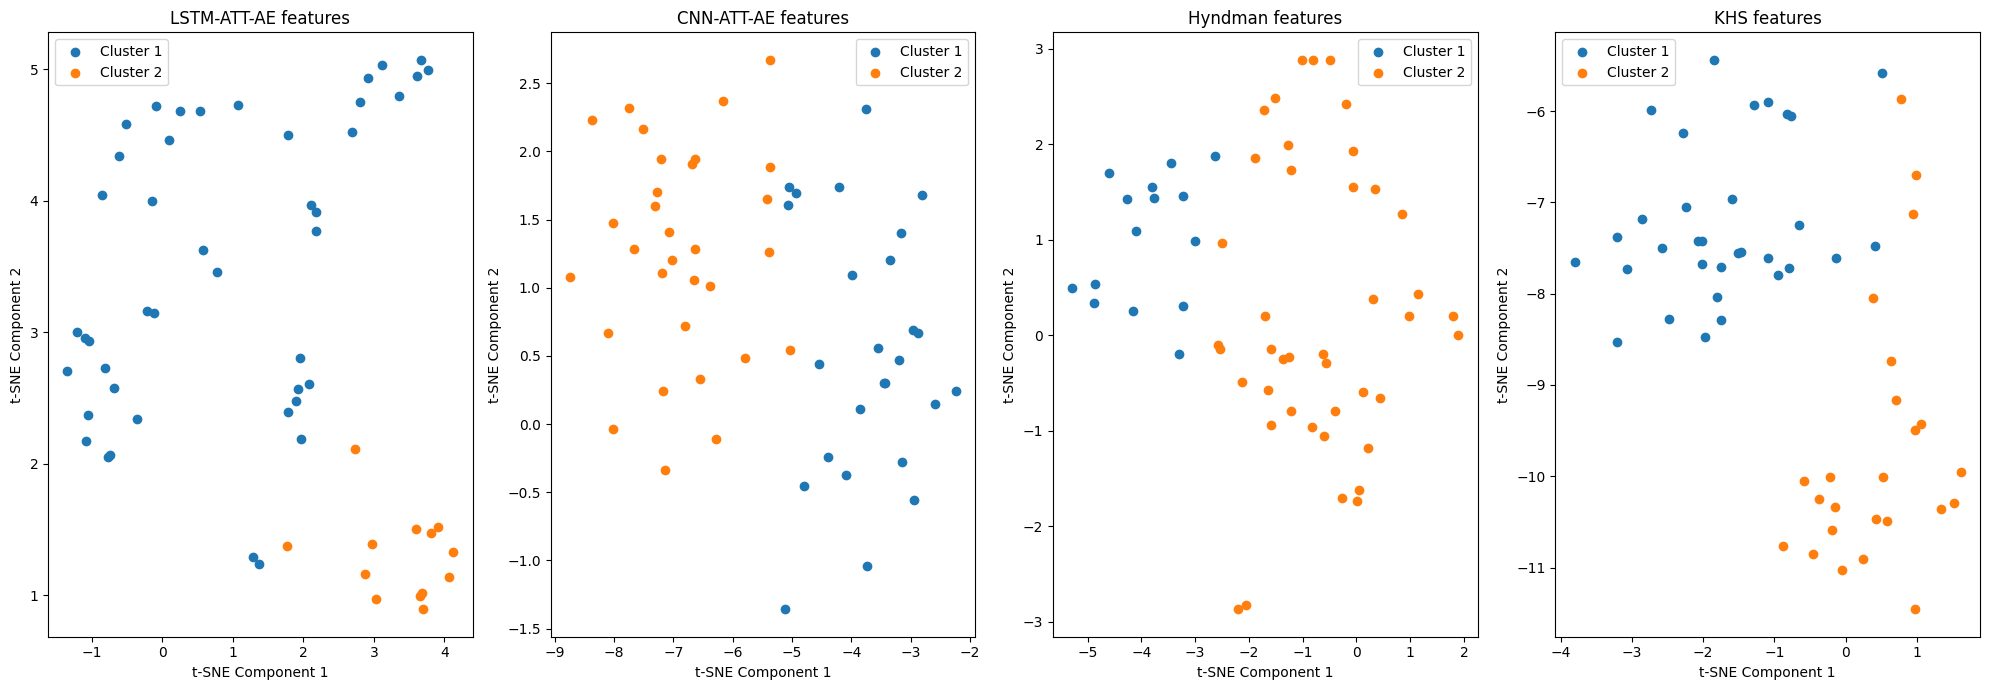

In [11]:
# Step 1: Standardize the features
scaled_features_lstm_8 = normalize_feature_vectors(cif_features_lstm_8)
scaled_features_lstm_16 = normalize_feature_vectors(cif_features_lstm_16)
scaled_features_lstm_32 = normalize_feature_vectors(cif_features_lstm_32)

scaled_features_cnn_8 = normalize_feature_vectors(cif_features_cnn_8)
scaled_features_cnn_16 = normalize_feature_vectors(cif_features_cnn_16)
scaled_features_cnn_32 = normalize_feature_vectors(cif_features_cnn_32)

scaled_features_hyndman = normalize_feature_vectors(cif_features_hyndman)
scaled_features_khs = normalize_feature_vectors(cif_features_khs)

# Step 2: Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features_lstm_8 = tsne.fit_transform(scaled_features_lstm_8)
embedded_features_lstm_16 = tsne.fit_transform(scaled_features_lstm_16)
embedded_features_lstm_32 = tsne.fit_transform(scaled_features_lstm_32)

embedded_features_cnn_8 = tsne.fit_transform(scaled_features_cnn_8)
embedded_features_cnn_16 = tsne.fit_transform(scaled_features_cnn_16)
embedded_features_cnn_32 = tsne.fit_transform(scaled_features_cnn_32)

embedded_features_hyndman = tsne.fit_transform(scaled_features_hyndman)
embedded_features_khs = tsne.fit_transform(scaled_features_khs)

# Step 4: Perform clustering using SpectralClustering
number_of_clusters = 2  # Set the number of clusters

spectral_clustering = SpectralClustering(n_clusters=number_of_clusters, assign_labels='discretize', random_state=0)
spectral_labels_lstm_8 = spectral_clustering.fit_predict(scaled_features_lstm_8)
spectral_labels_lstm_16 = spectral_clustering.fit_predict(scaled_features_lstm_16)
spectral_labels_lstm_32 = spectral_clustering.fit_predict(scaled_features_lstm_32)
spectral_labels_cnn_8 = spectral_clustering.fit_predict(scaled_features_cnn_8)
spectral_labels_cnn_16 = spectral_clustering.fit_predict(scaled_features_cnn_16)
spectral_labels_cnn_32 = spectral_clustering.fit_predict(scaled_features_cnn_32)
spectral_labels_hyndman = spectral_clustering.fit_predict(scaled_features_hyndman)
spectral_labels_khs = spectral_clustering.fit_predict(scaled_features_khs)


# Step 5: Visualize the clusters
plt.figure(figsize=(20, 7))

plt.subplot(1, 4, 1)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_lstm_16[spectral_labels_lstm_16 == i, 0], embedded_features_lstm_16[spectral_labels_lstm_16 == i, 1],
                label=f'Cluster {i+1}')
plt.title('LSTM-ATT-AE features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()


plt.subplot(1, 4, 2)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_cnn_8[spectral_labels_cnn_8 == i, 0], embedded_features_cnn_8[spectral_labels_cnn_8 == i, 1],
                label=f'Cluster {i+1}')
plt.title('CNN-ATT-AE features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 4, 3)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_hyndman[spectral_labels_hyndman == i, 0], embedded_features_hyndman[spectral_labels_hyndman == i, 1],
                label=f'Cluster {i+1}')
plt.title('Hyndman features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()  

plt.subplot(1, 4, 4)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_khs[spectral_labels_khs == i, 0], embedded_features_khs[spectral_labels_khs == i, 1],
                label=f'Cluster {i+1}')
plt.title('KHS features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.savefig('CIF.png')

plt.show()

# M3

## M3 Demo

In [12]:
demo_features_lstm_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_demo_8.csv',sep=',', header=None)
demo_features_lstm_8 = demo_features_lstm_8.to_numpy().astype('float64')

demo_features_lstm_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_demo_16.csv',sep=',', header=None)
demo_features_lstm_16 = demo_features_lstm_16.to_numpy().astype('float64')

demo_features_lstm_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_demo_32.csv',sep=',', header=None)
demo_features_lstm_32 = demo_features_lstm_32.to_numpy().astype('float64')


demo_features_cnn_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_demo_8.csv',sep=',', header=None)
demo_features_cnn_8 = demo_features_cnn_8.to_numpy().astype('float64')

demo_features_cnn_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_demo_16.csv',sep=',', header=None)
demo_features_cnn_16 = demo_features_cnn_16.to_numpy().astype('float64')

demo_features_cnn_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_demo_32.csv',sep=',', header=None)
demo_features_cnn_32 = demo_features_cnn_32.to_numpy().astype('float64')

demo_features_hyndman = pd.read_csv('/kaggle/input/hyndmanm3/m3_demo-hyndman-features.csv',sep=',', header=0)
demo_features_hyndman = demo_features_hyndman.to_numpy().astype('float64')

demo_features_khs = pd.read_csv('/kaggle/input/m3-and-cifhyndmankhs/fs_KHS_m3_demo.csv',sep=',', header=0)
demo_features_khs = demo_features_khs.to_numpy().astype('float64')

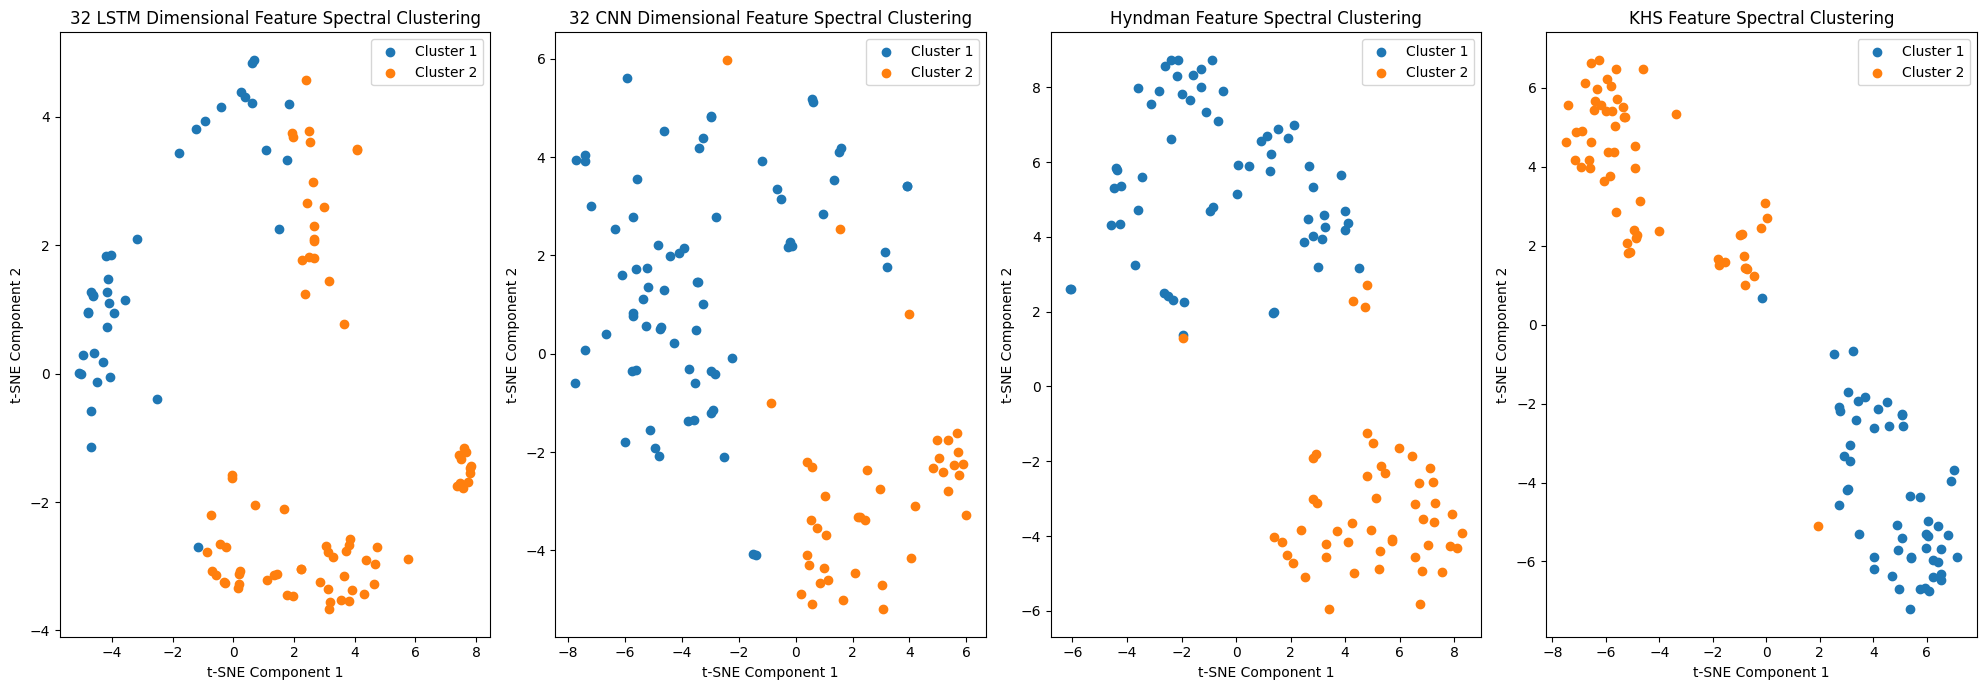

In [13]:
# Step 1: Standardize the features
scaled_features_lstm_8 = normalize_feature_vectors(demo_features_lstm_8)
scaled_features_lstm_16 = normalize_feature_vectors(demo_features_lstm_16)
scaled_features_lstm_32 = normalize_feature_vectors(demo_features_lstm_32)

scaled_features_cnn_8 = normalize_feature_vectors(demo_features_cnn_8)
scaled_features_cnn_16 = normalize_feature_vectors(demo_features_cnn_16)
scaled_features_cnn_32 = normalize_feature_vectors(demo_features_cnn_32)

scaled_features_hyndman = normalize_feature_vectors(demo_features_hyndman)
scaled_features_khs = normalize_feature_vectors(demo_features_khs)

# Step 2: Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features_lstm_8 = tsne.fit_transform(scaled_features_lstm_8)
embedded_features_lstm_16 = tsne.fit_transform(scaled_features_lstm_16)
embedded_features_lstm_32 = tsne.fit_transform(scaled_features_lstm_32)

embedded_features_cnn_8 = tsne.fit_transform(scaled_features_cnn_8)
embedded_features_cnn_16 = tsne.fit_transform(scaled_features_cnn_16)
embedded_features_cnn_32 = tsne.fit_transform(scaled_features_cnn_32)

embedded_features_hyndman = tsne.fit_transform(scaled_features_hyndman)
embedded_features_khs = tsne.fit_transform(scaled_features_khs)

# Step 4: Perform clustering using SpectralClustering
number_of_clusters = 2  # Set the number of clusters

spectral_clustering = SpectralClustering(n_clusters=number_of_clusters, assign_labels='discretize', random_state=0)
spectral_labels_lstm_8 = spectral_clustering.fit_predict(scaled_features_lstm_8)
spectral_labels_lstm_16 = spectral_clustering.fit_predict(scaled_features_lstm_16)
spectral_labels_lstm_32 = spectral_clustering.fit_predict(scaled_features_lstm_32)
spectral_labels_cnn_8 = spectral_clustering.fit_predict(scaled_features_cnn_8)
spectral_labels_cnn_16 = spectral_clustering.fit_predict(scaled_features_cnn_16)
spectral_labels_cnn_32 = spectral_clustering.fit_predict(scaled_features_cnn_32)
spectral_labels_hyndman = spectral_clustering.fit_predict(scaled_features_hyndman)
spectral_labels_khs = spectral_clustering.fit_predict(scaled_features_khs)


# Step 5: Visualize the clusters
plt.figure(figsize=(20, 7))

plt.subplot(1, 4, 1)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_lstm_32[spectral_labels_lstm_32 == i, 0], embedded_features_lstm_32[spectral_labels_lstm_32 == i, 1],
                label=f'Cluster {i+1}')
plt.title('32 LSTM Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()


plt.subplot(1, 4, 2)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_cnn_32[spectral_labels_cnn_32 == i, 0], embedded_features_cnn_32[spectral_labels_cnn_32 == i, 1],
                label=f'Cluster {i+1}')
plt.title('32 CNN Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 4, 3)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_hyndman[spectral_labels_hyndman == i, 0], embedded_features_hyndman[spectral_labels_hyndman == i, 1],
                label=f'Cluster {i+1}')
plt.title('Hyndman Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()  

plt.subplot(1, 4, 4)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_khs[spectral_labels_khs == i, 0], embedded_features_khs[spectral_labels_khs == i, 1],
                label=f'Cluster {i+1}')
plt.title('KHS Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.show()

## M3 Finance

In [14]:
finance_features_lstm_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_finance_8.csv',sep=',', header=None)
finance_features_lstm_8 = finance_features_lstm_8.to_numpy().astype('float64')

finance_features_lstm_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_finance_16.csv',sep=',', header=None)
finance_features_lstm_16 = finance_features_lstm_16.to_numpy().astype('float64')

finance_features_lstm_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_finance_32.csv',sep=',', header=None)
finance_features_lstm_32 = finance_features_lstm_32.to_numpy().astype('float64')

finance_features_cnn_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_finance_8.csv',sep=',', header=None)
finance_features_cnn_8 = finance_features_cnn_8.to_numpy().astype('float64')

finance_features_cnn_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_finance_16.csv',sep=',', header=None)
finance_features_cnn_16 = finance_features_cnn_16.to_numpy().astype('float64')

finance_features_cnn_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_finance_32.csv',sep=',', header=None)
finance_features_cnn_32 = finance_features_cnn_32.to_numpy().astype('float64')

finance_features_hyndman = pd.read_csv('/kaggle/input/hyndmanm3/m3_finance-hyndman-khs-features.csv',sep=',', header=0)
finance_features_hyndman = finance_features_hyndman.to_numpy().astype('float64')

finance_features_khs = pd.read_csv('/kaggle/input/m3-and-cifhyndmankhs/fs_KHS_m3_finance.csv',sep=',', header=0)
finance_features_khs = finance_features_khs.to_numpy().astype('float64')

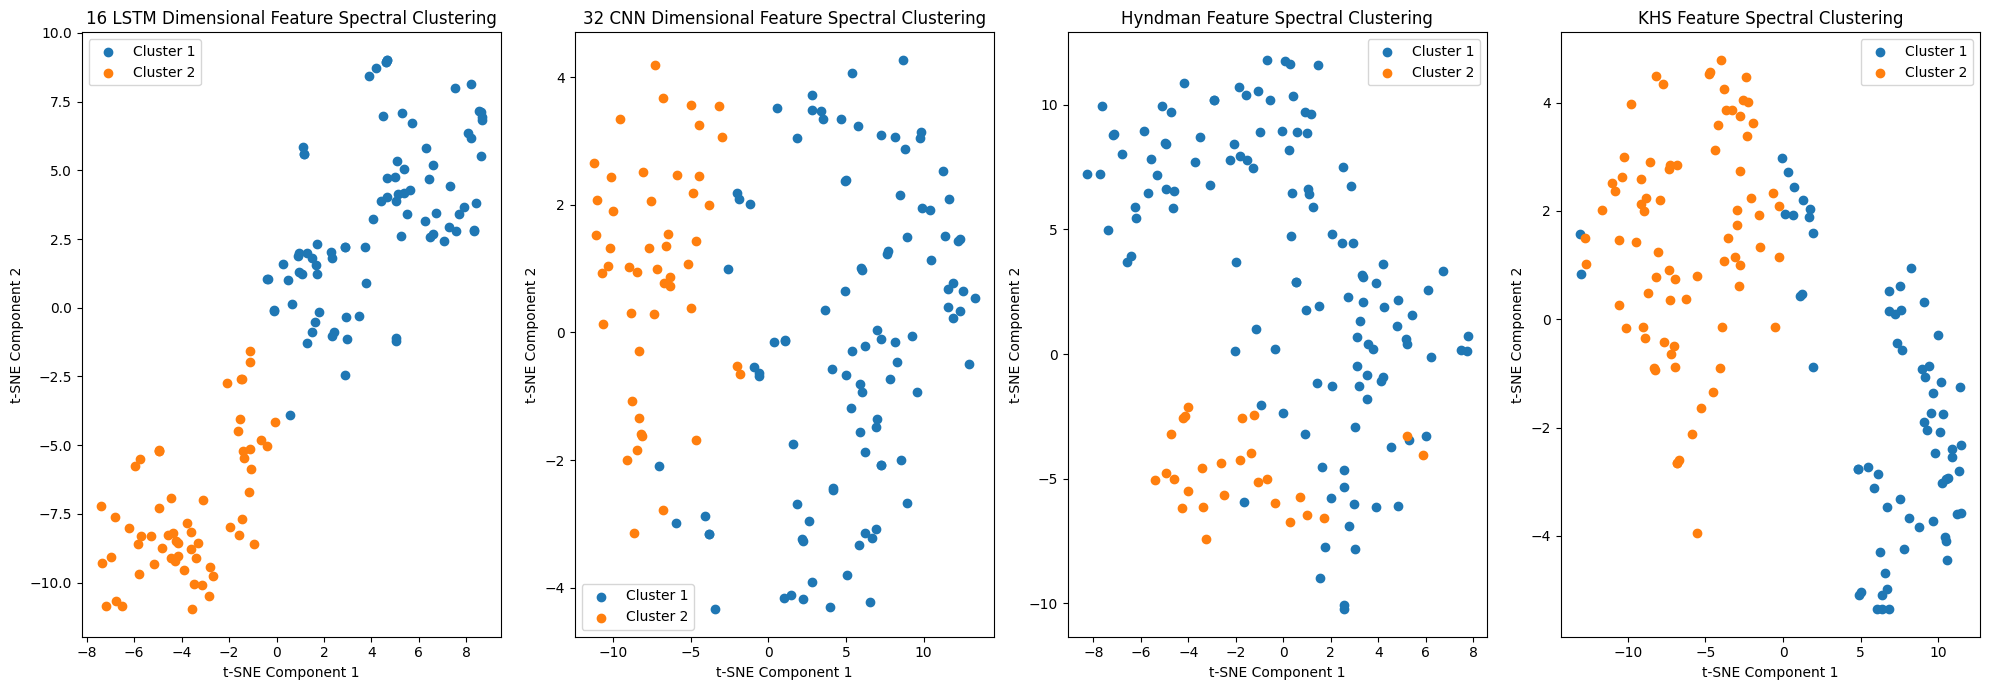

In [15]:
# Step 1: Standardize the features
scaled_features_lstm_8 = normalize_feature_vectors(finance_features_lstm_8)
scaled_features_lstm_16 = normalize_feature_vectors(finance_features_lstm_16)
scaled_features_lstm_32 = normalize_feature_vectors(finance_features_lstm_32)

scaled_features_cnn_8 = normalize_feature_vectors(finance_features_cnn_8)
scaled_features_cnn_16 = normalize_feature_vectors(finance_features_cnn_16)
scaled_features_cnn_32 = normalize_feature_vectors(finance_features_cnn_32)

scaled_features_hyndman = normalize_feature_vectors(finance_features_hyndman)
scaled_features_khs = normalize_feature_vectors(finance_features_khs)

# Step 2: Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features_lstm_8 = tsne.fit_transform(scaled_features_lstm_8)
embedded_features_lstm_16 = tsne.fit_transform(scaled_features_lstm_16)
embedded_features_lstm_32 = tsne.fit_transform(scaled_features_lstm_32)

embedded_features_cnn_8 = tsne.fit_transform(scaled_features_cnn_8)
embedded_features_cnn_16 = tsne.fit_transform(scaled_features_cnn_16)
embedded_features_cnn_32 = tsne.fit_transform(scaled_features_cnn_32)

embedded_features_hyndman = tsne.fit_transform(scaled_features_hyndman)
embedded_features_khs = tsne.fit_transform(scaled_features_khs)

# Step 4: Perform clustering using SpectralClustering
number_of_clusters = 2  # Set the number of clusters

spectral_clustering = SpectralClustering(n_clusters=number_of_clusters, assign_labels='discretize', random_state=0)
spectral_labels_lstm_8 = spectral_clustering.fit_predict(scaled_features_lstm_8)
spectral_labels_lstm_16 = spectral_clustering.fit_predict(scaled_features_lstm_16)
spectral_labels_lstm_32 = spectral_clustering.fit_predict(scaled_features_lstm_32)
spectral_labels_cnn_8 = spectral_clustering.fit_predict(scaled_features_cnn_8)
spectral_labels_cnn_16 = spectral_clustering.fit_predict(scaled_features_cnn_16)
spectral_labels_cnn_32 = spectral_clustering.fit_predict(scaled_features_cnn_32)
spectral_labels_hyndman = spectral_clustering.fit_predict(scaled_features_hyndman)
spectral_labels_khs = spectral_clustering.fit_predict(scaled_features_khs)


# Step 5: Visualize the clusters
plt.figure(figsize=(20, 7))

plt.subplot(1, 4, 1)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_lstm_16[spectral_labels_lstm_16 == i, 0], embedded_features_lstm_16[spectral_labels_lstm_16 == i, 1],
                label=f'Cluster {i+1}')
plt.title('16 LSTM Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()


plt.subplot(1, 4, 2)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_cnn_32[spectral_labels_cnn_32 == i, 0], embedded_features_cnn_32[spectral_labels_cnn_32 == i, 1],
                label=f'Cluster {i+1}')
plt.title('32 CNN Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 4, 3)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_hyndman[spectral_labels_hyndman == i, 0], embedded_features_hyndman[spectral_labels_hyndman == i, 1],
                label=f'Cluster {i+1}')
plt.title('Hyndman Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()  

plt.subplot(1, 4, 4)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_khs[spectral_labels_khs == i, 0], embedded_features_khs[spectral_labels_khs == i, 1],
                label=f'Cluster {i+1}')
plt.title('KHS Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.show()

## M3 Industry

In [16]:
industry_features_lstm_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_industry_8.csv',sep=',', header=None)
industry_features_lstm_8 = industry_features_lstm_8.to_numpy().astype('float64')

industry_features_lstm_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_industry_16.csv',sep=',', header=None)
industry_features_lstm_16 = industry_features_lstm_16.to_numpy().astype('float64')

industry_features_lstm_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_industry_32.csv',sep=',', header=None)
industry_features_lstm_32 = industry_features_lstm_32.to_numpy().astype('float64')

industry_features_cnn_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_industry_8.csv',sep=',', header=None)
industry_features_cnn_8 = industry_features_cnn_8.to_numpy().astype('float64')

industry_features_cnn_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_industry_16.csv',sep=',', header=None)
industry_features_cnn_16 = industry_features_cnn_16.to_numpy().astype('float64')

industry_features_cnn_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_industry_32.csv',sep=',', header=None)
industry_features_cnn_32 = industry_features_cnn_32.to_numpy().astype('float64')

industry_features_hyndman = pd.read_csv('/kaggle/input/hyndmanm3/m3_industry-hyndman-features.csv',sep=',', header=0)
industry_features_hyndman = industry_features_hyndman.to_numpy().astype('float64')

industry_features_khs = pd.read_csv('/kaggle/input/m3-and-cifhyndmankhs/fs_KHS_m3_industry.csv',sep=',', header=0)
industry_features_khs = industry_features_khs.to_numpy().astype('float64')

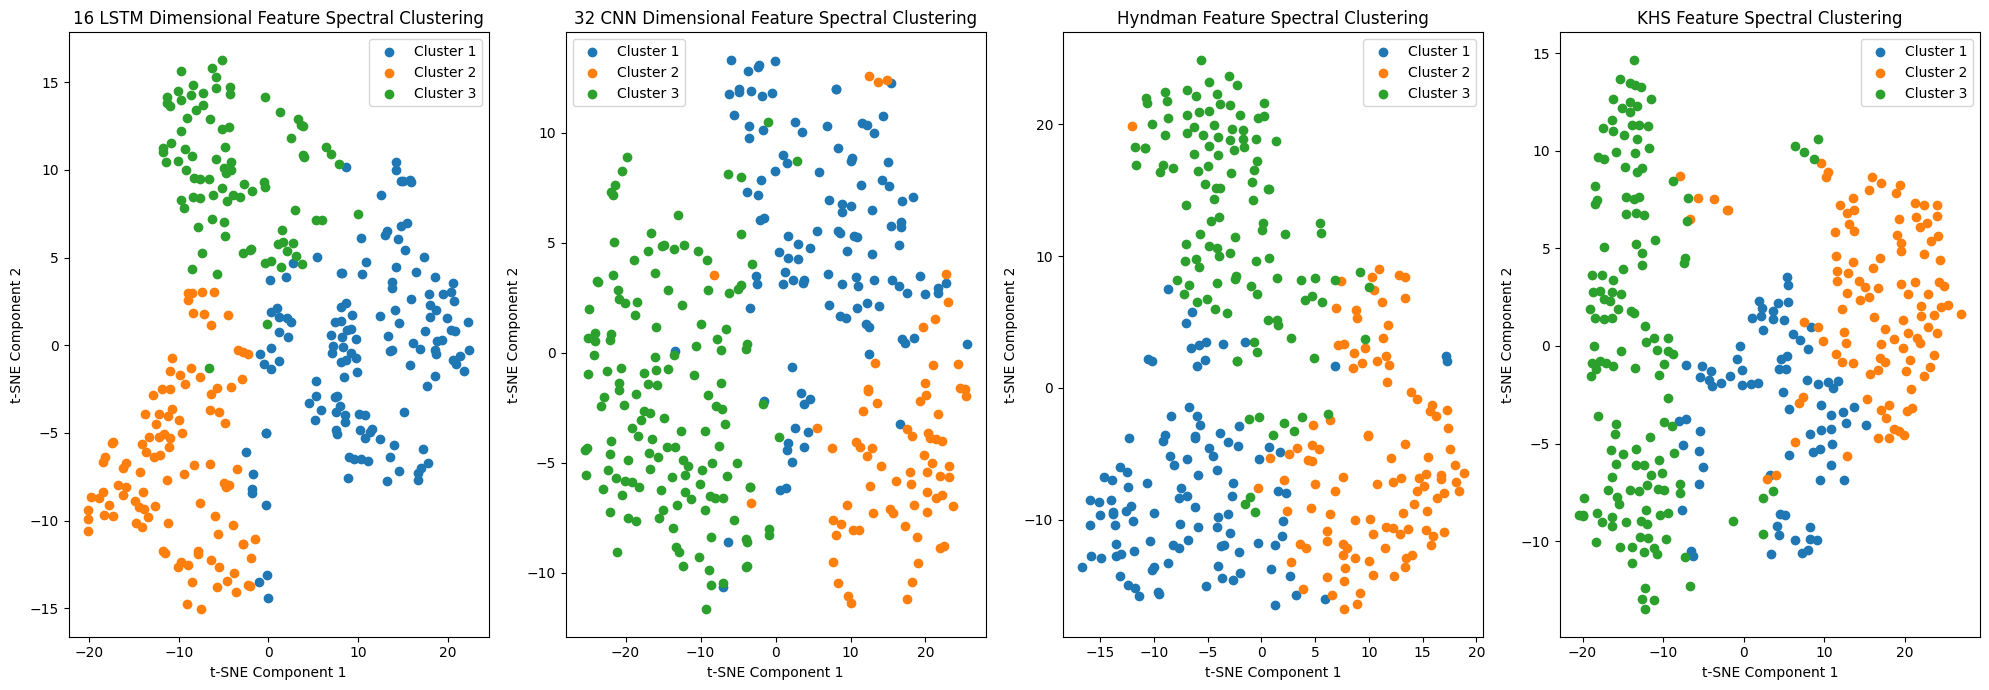

In [17]:
# Step 1: Standardize the features
scaled_features_lstm_8 = normalize_feature_vectors(industry_features_lstm_8)
scaled_features_lstm_16 = normalize_feature_vectors(industry_features_lstm_16)
scaled_features_lstm_32 = normalize_feature_vectors(industry_features_lstm_32)

scaled_features_cnn_8 = normalize_feature_vectors(industry_features_cnn_8)
scaled_features_cnn_16 = normalize_feature_vectors(industry_features_cnn_16)
scaled_features_cnn_32 = normalize_feature_vectors(industry_features_cnn_32)

scaled_features_hyndman = normalize_feature_vectors(industry_features_hyndman)
scaled_features_khs = normalize_feature_vectors(industry_features_khs)

# Step 2: Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features_lstm_8 = tsne.fit_transform(scaled_features_lstm_8)
embedded_features_lstm_16 = tsne.fit_transform(scaled_features_lstm_16)
embedded_features_lstm_32 = tsne.fit_transform(scaled_features_lstm_32)

embedded_features_cnn_8 = tsne.fit_transform(scaled_features_cnn_8)
embedded_features_cnn_16 = tsne.fit_transform(scaled_features_cnn_16)
embedded_features_cnn_32 = tsne.fit_transform(scaled_features_cnn_32)

embedded_features_hyndman = tsne.fit_transform(scaled_features_hyndman)
embedded_features_khs = tsne.fit_transform(scaled_features_khs)

# Step 4: Perform clustering using SpectralClustering
number_of_clusters = 3  # Set the number of clusters

spectral_clustering = SpectralClustering(n_clusters=number_of_clusters, assign_labels='discretize', random_state=0)
spectral_labels_lstm_8 = spectral_clustering.fit_predict(scaled_features_lstm_8)
spectral_labels_lstm_16 = spectral_clustering.fit_predict(scaled_features_lstm_16)
spectral_labels_lstm_32 = spectral_clustering.fit_predict(scaled_features_lstm_32)
spectral_labels_cnn_8 = spectral_clustering.fit_predict(scaled_features_cnn_8)
spectral_labels_cnn_16 = spectral_clustering.fit_predict(scaled_features_cnn_16)
spectral_labels_cnn_32 = spectral_clustering.fit_predict(scaled_features_cnn_32)
spectral_labels_hyndman = spectral_clustering.fit_predict(scaled_features_hyndman)
spectral_labels_khs = spectral_clustering.fit_predict(scaled_features_khs)


# Step 5: Visualize the clusters
plt.figure(figsize=(20, 7))

plt.subplot(1, 4, 1)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_lstm_16[spectral_labels_lstm_16 == i, 0], embedded_features_lstm_16[spectral_labels_lstm_16 == i, 1],
                label=f'Cluster {i+1}')
plt.title('16 LSTM Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()


plt.subplot(1, 4, 2)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_cnn_32[spectral_labels_cnn_32 == i, 0], embedded_features_cnn_32[spectral_labels_cnn_32 == i, 1],
                label=f'Cluster {i+1}')
plt.title('32 CNN Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 4, 3)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_hyndman[spectral_labels_hyndman == i, 0], embedded_features_hyndman[spectral_labels_hyndman == i, 1],
                label=f'Cluster {i+1}')
plt.title('Hyndman Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()  

plt.subplot(1, 4, 4)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_khs[spectral_labels_khs == i, 0], embedded_features_khs[spectral_labels_khs == i, 1],
                label=f'Cluster {i+1}')
plt.title('KHS Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.show()

## M3 Macro

In [18]:
macro_features_lstm_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_macro_8.csv',sep=',', header=None)
macro_features_lstm_8 = macro_features_lstm_8.to_numpy().astype('float64')

macro_features_lstm_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_macro_16.csv',sep=',', header=None)
macro_features_lstm_16 = macro_features_lstm_16.to_numpy().astype('float64')

macro_features_lstm_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_macro_32.csv',sep=',', header=None)
macro_features_lstm_32 = macro_features_lstm_32.to_numpy().astype('float64')

macro_features_cnn_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_macro_8.csv',sep=',', header=None)
macro_features_cnn_8 = macro_features_cnn_8.to_numpy().astype('float64')

macro_features_cnn_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_macro_16.csv',sep=',', header=None)
macro_features_cnn_16 = macro_features_cnn_16.to_numpy().astype('float64')

macro_features_cnn_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_macro_32.csv',sep=',', header=None)
macro_features_cnn_32 = macro_features_cnn_32.to_numpy().astype('float64')

macro_features_hyndman = pd.read_csv('/kaggle/input/hyndmanm3/m3_macro-hyndman-features.csv',sep=',', header=0)
macro_features_hyndman = macro_features_hyndman.to_numpy().astype('float64')

macro_features_khs = pd.read_csv('/kaggle/input/m3-and-cifhyndmankhs/fs_KHS_m3_macro.csv',sep=',', header=0)
macro_features_khs = macro_features_khs.to_numpy().astype('float64')


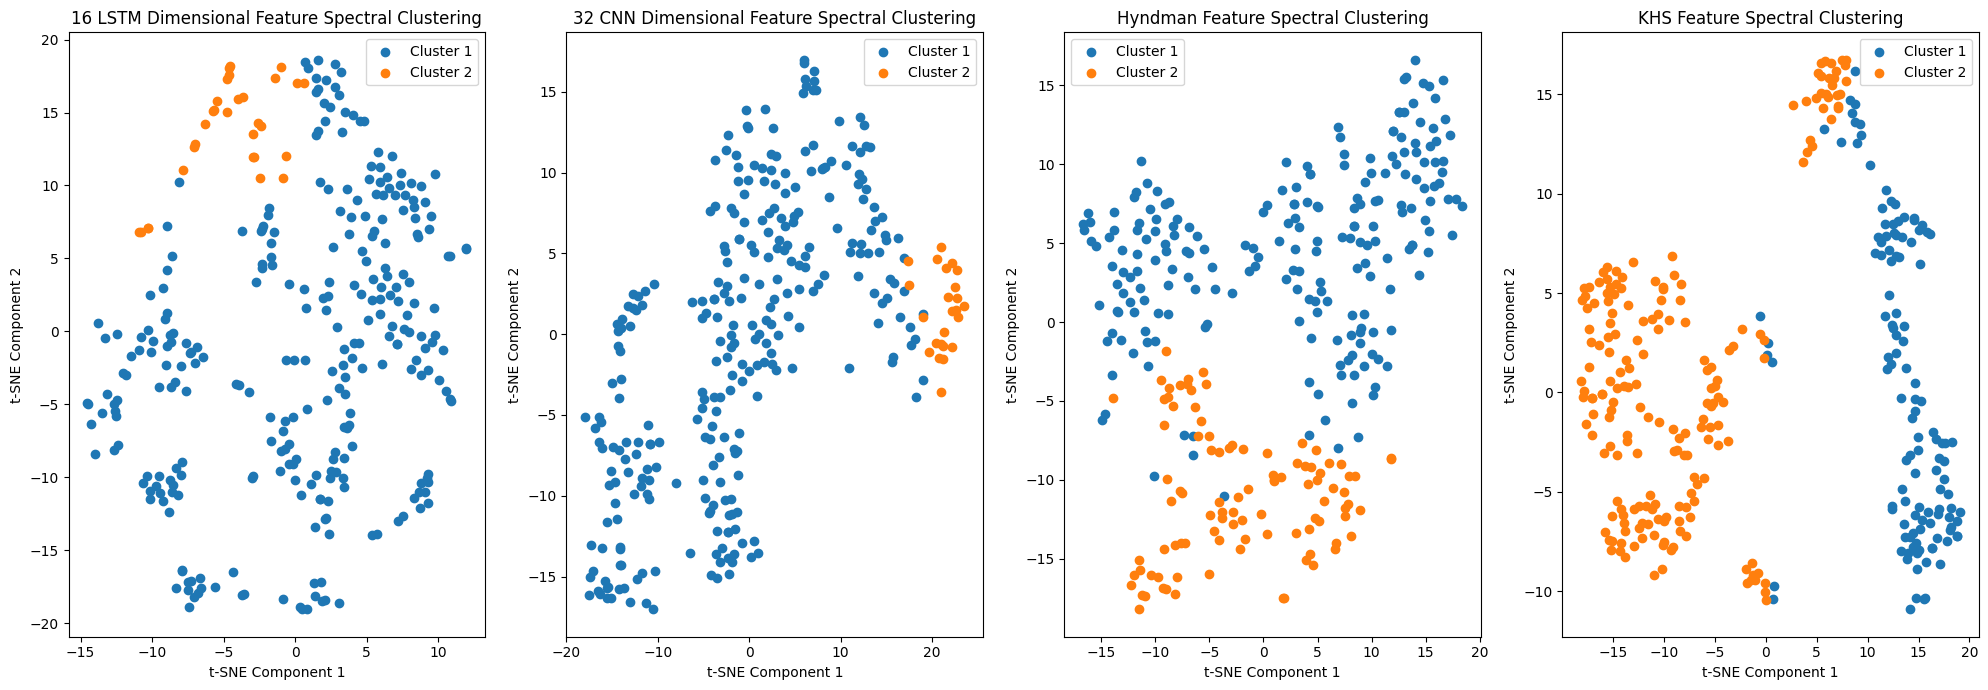

In [19]:
# Step 1: Standardize the features
scaled_features_lstm_8 = normalize_feature_vectors(macro_features_lstm_8)
scaled_features_lstm_16 = normalize_feature_vectors(macro_features_lstm_16)
scaled_features_lstm_32 = normalize_feature_vectors(macro_features_lstm_32)

scaled_features_cnn_8 = normalize_feature_vectors(macro_features_cnn_8)
scaled_features_cnn_16 = normalize_feature_vectors(macro_features_cnn_16)
scaled_features_cnn_32 = normalize_feature_vectors(macro_features_cnn_32)

scaled_features_hyndman = normalize_feature_vectors(macro_features_hyndman)
scaled_features_khs = normalize_feature_vectors(macro_features_khs)

# Step 2: Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features_lstm_8 = tsne.fit_transform(scaled_features_lstm_8)
embedded_features_lstm_16 = tsne.fit_transform(scaled_features_lstm_16)
embedded_features_lstm_32 = tsne.fit_transform(scaled_features_lstm_32)

embedded_features_cnn_8 = tsne.fit_transform(scaled_features_cnn_8)
embedded_features_cnn_16 = tsne.fit_transform(scaled_features_cnn_16)
embedded_features_cnn_32 = tsne.fit_transform(scaled_features_cnn_32)

embedded_features_hyndman = tsne.fit_transform(scaled_features_hyndman)
embedded_features_khs = tsne.fit_transform(scaled_features_khs)

# Step 4: Perform clustering using SpectralClustering
number_of_clusters = 2  # Set the number of clusters

spectral_clustering = SpectralClustering(n_clusters=number_of_clusters, assign_labels='discretize', random_state=0)
spectral_labels_lstm_8 = spectral_clustering.fit_predict(scaled_features_lstm_8)
spectral_labels_lstm_16 = spectral_clustering.fit_predict(scaled_features_lstm_16)
spectral_labels_lstm_32 = spectral_clustering.fit_predict(scaled_features_lstm_32)
spectral_labels_cnn_8 = spectral_clustering.fit_predict(scaled_features_cnn_8)
spectral_labels_cnn_16 = spectral_clustering.fit_predict(scaled_features_cnn_16)
spectral_labels_cnn_32 = spectral_clustering.fit_predict(scaled_features_cnn_32)
spectral_labels_hyndman = spectral_clustering.fit_predict(scaled_features_hyndman)
spectral_labels_khs = spectral_clustering.fit_predict(scaled_features_khs)


# Step 5: Visualize the clusters
plt.figure(figsize=(20, 7))

plt.subplot(1, 4, 1)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_lstm_16[spectral_labels_lstm_16 == i, 0], embedded_features_lstm_16[spectral_labels_lstm_16 == i, 1],
                label=f'Cluster {i+1}')
plt.title('16 LSTM Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()


plt.subplot(1, 4, 2)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_cnn_32[spectral_labels_cnn_32 == i, 0], embedded_features_cnn_32[spectral_labels_cnn_32 == i, 1],
                label=f'Cluster {i+1}')
plt.title('32 CNN Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 4, 3)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_hyndman[spectral_labels_hyndman == i, 0], embedded_features_hyndman[spectral_labels_hyndman == i, 1],
                label=f'Cluster {i+1}')
plt.title('Hyndman Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()  

plt.subplot(1, 4, 4)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_khs[spectral_labels_khs == i, 0], embedded_features_khs[spectral_labels_khs == i, 1],
                label=f'Cluster {i+1}')
plt.title('KHS Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.show()

## M3 Micro

In [20]:
micro_features_lstm_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_micro_8.csv',sep=',', header=None)
micro_features_lstm_8 = micro_features_lstm_8.to_numpy().astype('float64')

micro_features_lstm_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_micro_16.csv',sep=',', header=None)
micro_features_lstm_16 = micro_features_lstm_16.to_numpy().astype('float64')

micro_features_lstm_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_micro_32.csv',sep=',', header=None)
micro_features_lstm_32 = micro_features_lstm_32.to_numpy().astype('float64')

micro_features_cnn_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_micro_8.csv',sep=',', header=None)
micro_features_cnn_8 = micro_features_cnn_8.to_numpy().astype('float64')

micro_features_cnn_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_micro_16.csv',sep=',', header=None)
micro_features_cnn_16 = micro_features_cnn_16.to_numpy().astype('float64')

micro_features_cnn_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_micro_32.csv',sep=',', header=None)
micro_features_cnn_32 = micro_features_cnn_32.to_numpy().astype('float64')

micro_features_hyndman = pd.read_csv('/kaggle/input/hyndmanm3/m3_micro-hyndman-features.csv',sep=',', header=0)
micro_features_hyndman = micro_features_hyndman.to_numpy().astype('float64')

micro_features_khs = pd.read_csv('/kaggle/input/m3-and-cifhyndmankhs/fs_KHS_m3_micro.csv',sep=',', header=0)
micro_features_khs = micro_features_khs.to_numpy().astype('float64')

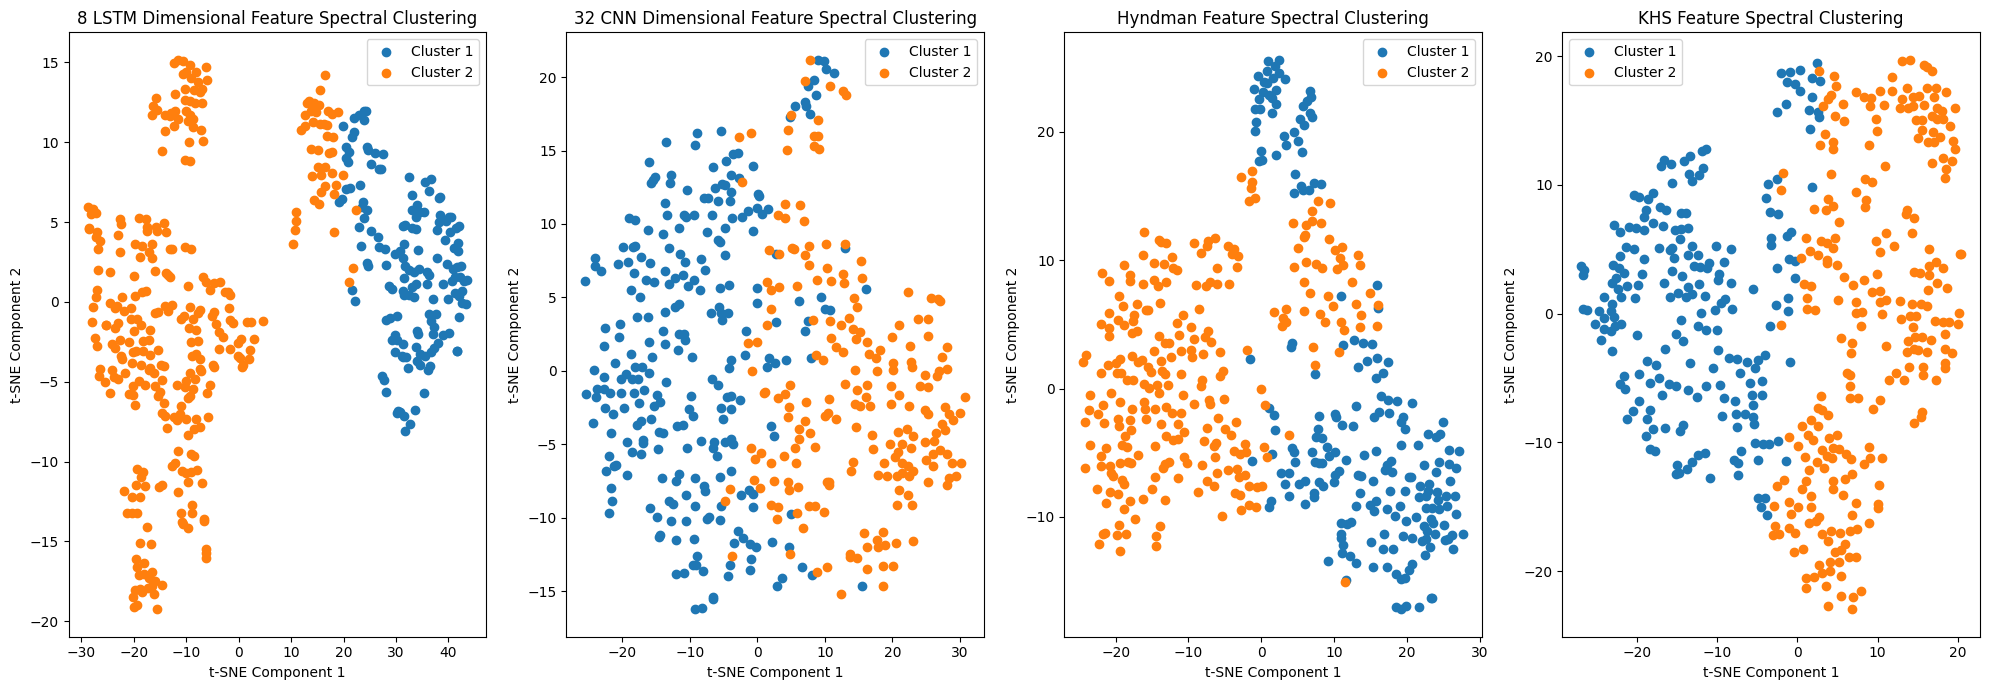

In [21]:
# Step 1: Standardize the features
scaled_features_lstm_8 = normalize_feature_vectors(micro_features_lstm_8)
scaled_features_lstm_16 = normalize_feature_vectors(micro_features_lstm_16)
scaled_features_lstm_32 = normalize_feature_vectors(micro_features_lstm_32)

scaled_features_cnn_8 = normalize_feature_vectors(micro_features_cnn_8)
scaled_features_cnn_16 = normalize_feature_vectors(micro_features_cnn_16)
scaled_features_cnn_32 = normalize_feature_vectors(micro_features_cnn_32)

scaled_features_hyndman = normalize_feature_vectors(micro_features_hyndman)
scaled_features_khs = normalize_feature_vectors(micro_features_khs)

# Step 2: Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features_lstm_8 = tsne.fit_transform(scaled_features_lstm_8)
embedded_features_lstm_16 = tsne.fit_transform(scaled_features_lstm_16)
embedded_features_lstm_32 = tsne.fit_transform(scaled_features_lstm_32)

embedded_features_cnn_8 = tsne.fit_transform(scaled_features_cnn_8)
embedded_features_cnn_16 = tsne.fit_transform(scaled_features_cnn_16)
embedded_features_cnn_32 = tsne.fit_transform(scaled_features_cnn_32)

embedded_features_hyndman = tsne.fit_transform(scaled_features_hyndman)
embedded_features_khs = tsne.fit_transform(scaled_features_khs)

# Step 4: Perform clustering using SpectralClustering
number_of_clusters = 2  # Set the number of clusters

spectral_clustering = SpectralClustering(n_clusters=number_of_clusters, assign_labels='discretize', random_state=0)
spectral_labels_lstm_8 = spectral_clustering.fit_predict(scaled_features_lstm_8)
spectral_labels_lstm_16 = spectral_clustering.fit_predict(scaled_features_lstm_16)
spectral_labels_lstm_32 = spectral_clustering.fit_predict(scaled_features_lstm_32)
spectral_labels_cnn_8 = spectral_clustering.fit_predict(scaled_features_cnn_8)
spectral_labels_cnn_16 = spectral_clustering.fit_predict(scaled_features_cnn_16)
spectral_labels_cnn_32 = spectral_clustering.fit_predict(scaled_features_cnn_32)
spectral_labels_hyndman = spectral_clustering.fit_predict(scaled_features_hyndman)
spectral_labels_khs = spectral_clustering.fit_predict(scaled_features_khs)


# Step 5: Visualize the clusters
plt.figure(figsize=(20, 7))

plt.subplot(1, 4, 1)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_lstm_8[spectral_labels_lstm_8 == i, 0], embedded_features_lstm_8[spectral_labels_lstm_8 == i, 1],
                label=f'Cluster {i+1}')
plt.title('8 LSTM Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()


plt.subplot(1, 4, 2)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_cnn_32[spectral_labels_cnn_32 == i, 0], embedded_features_cnn_32[spectral_labels_cnn_32 == i, 1],
                label=f'Cluster {i+1}')
plt.title('32 CNN Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 4, 3)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_hyndman[spectral_labels_hyndman == i, 0], embedded_features_hyndman[spectral_labels_hyndman == i, 1],
                label=f'Cluster {i+1}')
plt.title('Hyndman Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()  

plt.subplot(1, 4, 4)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_khs[spectral_labels_khs == i, 0], embedded_features_khs[spectral_labels_khs == i, 1],
                label=f'Cluster {i+1}')
plt.title('KHS Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.show()

## M3 Other

In [22]:
other_features_lstm_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_other_8.csv',sep=',', header=None)
other_features_lstm_8 = other_features_lstm_8.to_numpy().astype('float64')

other_features_lstm_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_other_16.csv',sep=',', header=None)
other_features_lstm_16 = other_features_lstm_16.to_numpy().astype('float64')

other_features_lstm_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attenlstm/Features_other_32.csv',sep=',', header=None)
other_features_lstm_32 = other_features_lstm_32.to_numpy().astype('float64')

other_features_cnn_8 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_other_8.csv',sep=',', header=None)
other_features_cnn_8 = other_features_cnn_8.to_numpy().astype('float64')

other_features_cnn_16 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_other_16.csv',sep=',', header=None)
other_features_cnn_16 = other_features_cnn_16.to_numpy().astype('float64')

other_features_cnn_32 = pd.read_csv('/kaggle/input/ae-m3-unsupervised-attencnn/Features_other_32.csv',sep=',', header=None)
other_features_cnn_32 = other_features_cnn_32.to_numpy().astype('float64')

other_features_hyndman = pd.read_csv('/kaggle/input/hyndmanm3/m3_other-hyndman-features.csv',sep=',', header=0)
other_features_hyndman = other_features_hyndman.to_numpy().astype('float64')

other_features_khs = pd.read_csv('/kaggle/input/m3-and-cifhyndmankhs/fs_KHS_m3_other.csv',sep=',', header=0)
other_features_khs = other_features_khs.to_numpy().astype('float64')

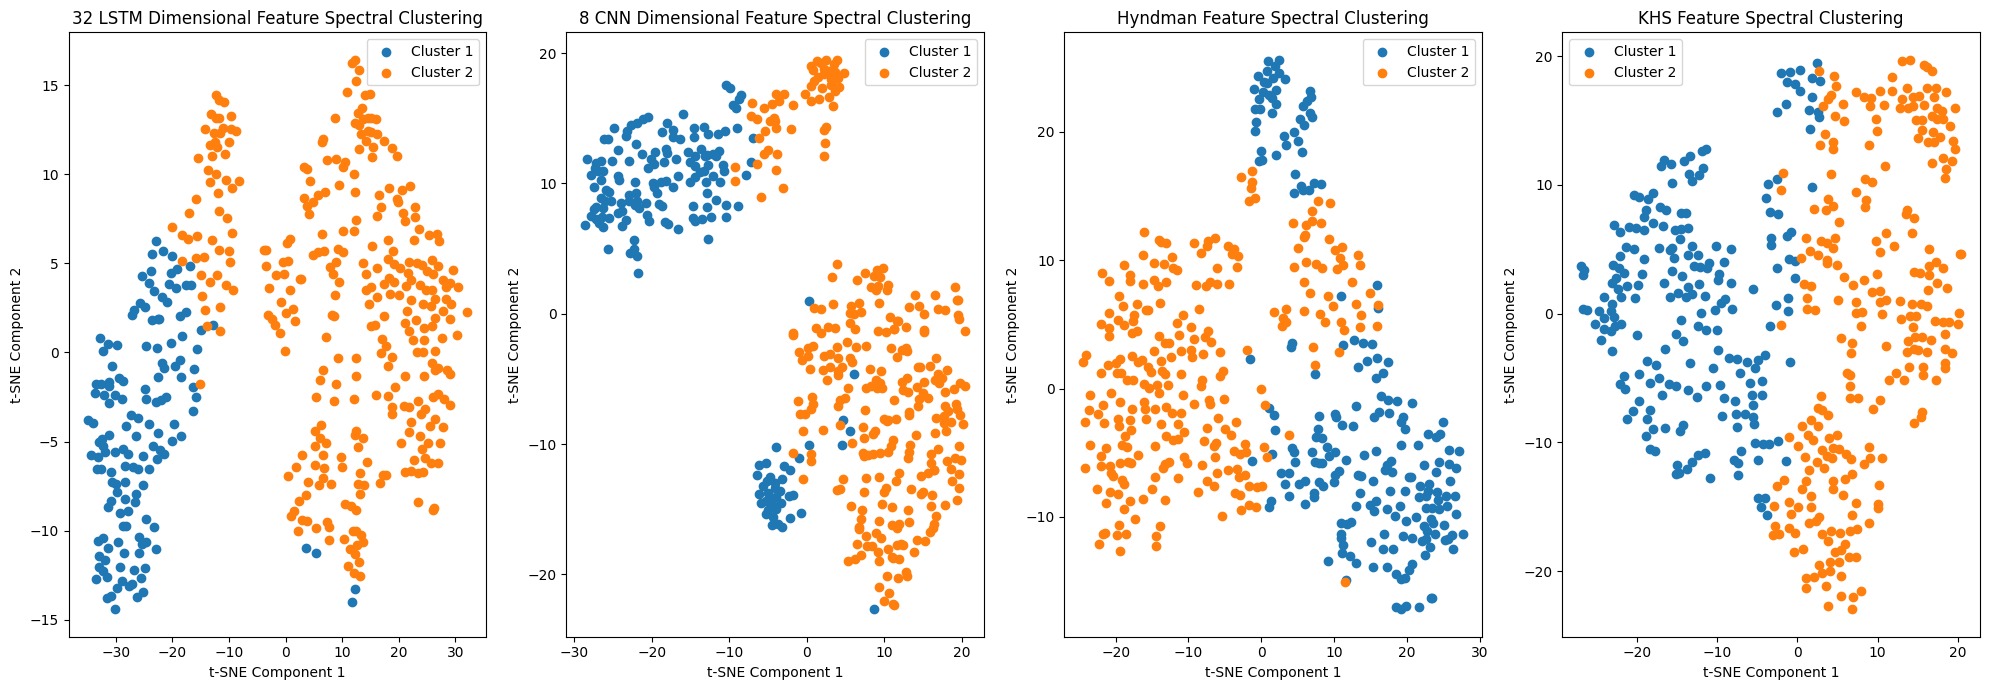

In [23]:
# Step 1: Standardize the features
scaled_features_lstm_8 = normalize_feature_vectors(micro_features_lstm_8)
scaled_features_lstm_16 = normalize_feature_vectors(micro_features_lstm_16)
scaled_features_lstm_32 = normalize_feature_vectors(micro_features_lstm_32)

scaled_features_cnn_8 = normalize_feature_vectors(micro_features_cnn_8)
scaled_features_cnn_16 = normalize_feature_vectors(micro_features_cnn_16)
scaled_features_cnn_32 = normalize_feature_vectors(micro_features_cnn_32)

scaled_features_hyndman = normalize_feature_vectors(micro_features_hyndman)
scaled_features_khs = normalize_feature_vectors(micro_features_khs)

# Step 2: Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features_lstm_8 = tsne.fit_transform(scaled_features_lstm_8)
embedded_features_lstm_16 = tsne.fit_transform(scaled_features_lstm_16)
embedded_features_lstm_32 = tsne.fit_transform(scaled_features_lstm_32)

embedded_features_cnn_8 = tsne.fit_transform(scaled_features_cnn_8)
embedded_features_cnn_16 = tsne.fit_transform(scaled_features_cnn_16)
embedded_features_cnn_32 = tsne.fit_transform(scaled_features_cnn_32)

embedded_features_hyndman = tsne.fit_transform(scaled_features_hyndman)
embedded_features_khs = tsne.fit_transform(scaled_features_khs)

# Step 4: Perform clustering using SpectralClustering
number_of_clusters = 2  # Set the number of clusters

spectral_clustering = SpectralClustering(n_clusters=number_of_clusters, assign_labels='discretize', random_state=0)
spectral_labels_lstm_8 = spectral_clustering.fit_predict(scaled_features_lstm_8)
spectral_labels_lstm_16 = spectral_clustering.fit_predict(scaled_features_lstm_16)
spectral_labels_lstm_32 = spectral_clustering.fit_predict(scaled_features_lstm_32)
spectral_labels_cnn_8 = spectral_clustering.fit_predict(scaled_features_cnn_8)
spectral_labels_cnn_16 = spectral_clustering.fit_predict(scaled_features_cnn_16)
spectral_labels_cnn_32 = spectral_clustering.fit_predict(scaled_features_cnn_32)
spectral_labels_hyndman = spectral_clustering.fit_predict(scaled_features_hyndman)
spectral_labels_khs = spectral_clustering.fit_predict(scaled_features_khs)


# Step 5: Visualize the clusters
plt.figure(figsize=(20, 7))

plt.subplot(1, 4, 1)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_lstm_32[spectral_labels_lstm_32 == i, 0], embedded_features_lstm_32[spectral_labels_lstm_32 == i, 1],
                label=f'Cluster {i+1}')
plt.title('32 LSTM Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()


plt.subplot(1, 4, 2)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_cnn_8[spectral_labels_cnn_8 == i, 0], embedded_features_cnn_8[spectral_labels_cnn_8 == i, 1],
                label=f'Cluster {i+1}')
plt.title('8 CNN Dimensional Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 4, 3)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_hyndman[spectral_labels_hyndman == i, 0], embedded_features_hyndman[spectral_labels_hyndman == i, 1],
                label=f'Cluster {i+1}')
plt.title('Hyndman Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()  

plt.subplot(1, 4, 4)
for i in range(number_of_clusters):
    plt.scatter(embedded_features_khs[spectral_labels_khs == i, 0], embedded_features_khs[spectral_labels_khs == i, 1],
                label=f'Cluster {i+1}')
plt.title('KHS Feature Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.show()